# Session 5: Advanced plotting

In this session we'll be looking at how to plot two-dimensional data.

<div class="alert alert-success">
<p>
<b>Intended learning outcomes:</b>
</p>
<p> At the end of this session, you should be able to:
<ul>
 <li> Produce density plots and contour plots of two-dimensional scalar data
 <li> Produce quiver and stream plots of two dimensional vector data
 <li> Choose appropriate representations of data
 <li> Use these techniques to consider key concepts from electrostatics
 </ul> </p>
</div>

## Contents:

* [1. Image mapping and density plots](#imagemapping)
* [2. Contour plots](#contourplots)
* [3. Plotting vector fields](#vectorfields)

## <a id="imagemapping"></a>1. Image mapping - density plots

We've already looked at "standard" plots - with data points or lines on a plot with an x- and y-axis. Now we're going to look at another type of plot, where the data set consists of a grid of data, which we can plot in two dimensions, using colour to indicate the data values. These are sometimes known as density plots.



We'll start by looking at a simple example - we'll load a data file from an [Scanning Tunnelling Microscope](http://en.wikipedia.org/wiki/Scanning_tunneling_microscope) experiment, which measures the structure of a surface at the atomic scale (some of you will have the opportunity to do a similar experiment in Lab 3).




To start, we'll import numpy and matplotlib, exactly as we did before.

In [1]:
# plot interactive figures embedded in the notebook
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt


We'll use np.loadtxt to load the data values from the file into an array, and then use the np.shape function to find out what shape the array is.

In [2]:
stmarray = np.loadtxt('stm.txt')

print (np.shape(stmarray))

(384, 384)


We can see that this is a two-dimensional array, with 384 columns and 384 rows. The matplotlib command to plot the array as an image is plt.imshow. You can find the full documentation at http://matplotlib.org/api/pyplot_api.html?highlight=imshow#matplotlib.pyplot.imshow, but we'll just stick to the basics here.

<IPython.core.display.Javascript object>


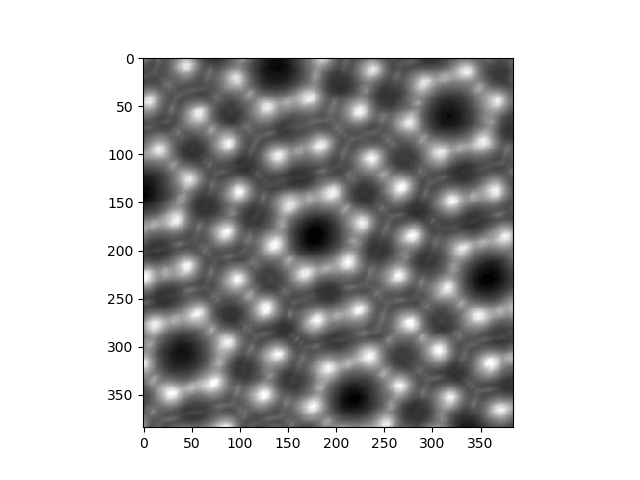

In [3]:
plt.figure()
# plt.imshow(stmarray) # default colours - varies according to local setup
plt.imshow(stmarray, cmap="gray"); # specify greyscale image

This has now produced a beautiful image of the atomic structure of the (111) silicon surface! 

A few things to note here. 

* Firstly, we can see that we have numbered axes - but by default, the origin is at the *top left*, not the bottom left as you might expect for a plot. In fact the default is to treat the image as a ***matrix***, where the [0,0] element is at the top left, and with the row index (i.e. the vertical, or $y$ component) first. You can move the origin to the bottom left using the origin="lower" option of imshow, but you still have to remember that the components are given as $(y,x)$, not $(x,y)$.

* The default (on Desktop@UCL machines) is to show the image as greyscale, but there are lots of other options available - see http://matplotlib.org/examples/color/colormaps_reference.html for a full list, and https://matplotlib.org/users/colormaps.html for detailed information on choosing appropriate colour maps.

* A colorbar is often useful to be able to map a colour back to its numerical value - use plt.colorbar to do this.

Here's the same array replotted with different settings to see this in practice:

<IPython.core.display.Javascript object>


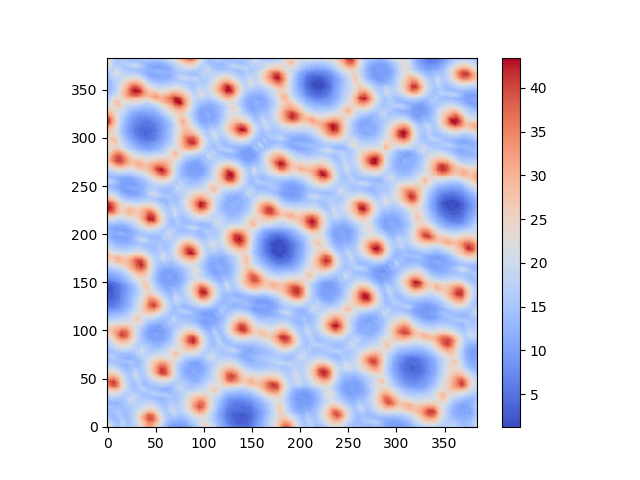

In [4]:
# Replot the information with the origin at the bottom left, and using a different colormap 
plt.figure()
plt.imshow(stmarray,origin="lower",cmap="coolwarm") 
plt.colorbar();                   # plots a bar indicating which value is mapped to which colour

<div class="alert alert-success"> Now it's your turn. 

<br>Download the file on Moodle named "imgdatatest.dat". This file contains data points delimited by commas. Your job is to:
<ul>

<li>Load the file into an array and determine its shape</li>
<li>Plot the array, choosing an appropriate position for the origin, and a colormap that displays the information in the array appropriately (to determine this, you will need to figure out what the array represents!)</li>
<li>In the second code cell, replot the array using a different colormap. Experiment with the colormap and find one that <b>minimizes</b> the information in the array (i.e. one that is not at all visually appropriate - so that you can't tell what the image represents at all!)</li>
</ul>
</div>

(200, 141)


<IPython.core.display.Javascript object>


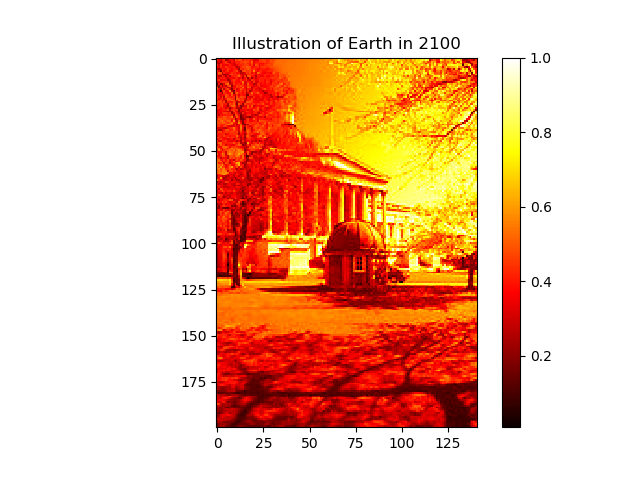

In [5]:
### STUDENT COMPLETED CELL: IMAGE WITH AN APPROPRIATE COLORMAP ###

imgarray = np.loadtxt('imgdatatest.dat', delimiter=',') # import image data separated by "," and assign to "imgarray"
print (np.shape(imgarray)) # outputs array dimensions

# data plotted with "hot" colourmap and origin at top left
plt.figure()
plt.imshow(imgarray,cmap="hot") # image plotted with origin defaulted to top left
plt.title("Illustration of Earth in 2100")
plt.colorbar(); # plots a bar indicating which value is mapped to which colour

<IPython.core.display.Javascript object>


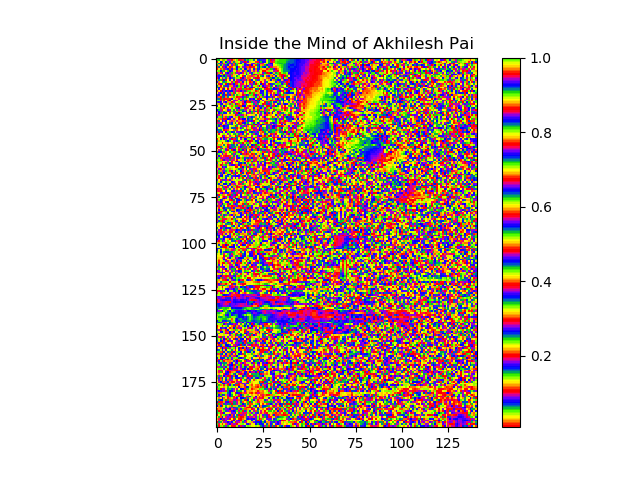

In [6]:
### STUDENT COMPLETED CELL: IMAGE WITH THE WORST COLORMAP YOU CAN FIND ###

# data plotted with "prism" colourmap and origin at top left
plt.figure()
plt.imshow(imgarray,cmap="prism") # image plotted with "prism" colourmap to distort
plt.title("Inside the Mind of Akhilesh Pai")
plt.colorbar(); # plots a bar indicating which value is mapped to which colour

##  <a id="contourplots"></a>2. Plotting contours

Now we'll look at another sort of two dimensional plot. In the third section, we'll look at a way of plotting vector fields, but we'll start here by plotting some scalar fields.

In physics we often encounter both scalar and vector fields. In this session we'll be using examples from electrostatics that you will be familiar with from PHAS2201 (Electricity and Magnetism) that most of you did last term.


#### Creating a mesh of grid values
As we've seen, if we want to make plots in a two-dimensional space, we need a *grid* of x and y values. When we were plotting data files, in the examples above, this was done automatically (the data was already saved in a two-dimensional format).

If we don't have this kind of data, then Numpy has a function to create a 2d grid for us: [mgrid](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mgrid.html). Look at how this works:



In [7]:
step = 0.2
y,x= np.mgrid[0:1:step, 0:1:step] # note we have y,x not x,y
print(" x is: \n", x)
print(np.shape(x))
print(" y is : \n", y)
print(np.shape(y))

 x is: 
 [[0.  0.2 0.4 0.6 0.8]
 [0.  0.2 0.4 0.6 0.8]
 [0.  0.2 0.4 0.6 0.8]
 [0.  0.2 0.4 0.6 0.8]
 [0.  0.2 0.4 0.6 0.8]]
(5, 5)
 y is : 
 [[0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4]
 [0.6 0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8 0.8]]
(5, 5)


This produces *two* 2d arrays - one for the x values, one for the y values. 
As before, we use matrix-like ordering, with the rows (y-values) as the first element and the columns (x-values) as the second. The data point $(x=0.4, y = 0.8)$ is therefore represented by the element in the final (fifth) row and third column.

Using standard Python indexing, where we start at zero not one, we look at an individual element, for example

In [8]:
print(x[4,2], y[4,2])

0.4 0.8


We can see that the element in the fifth row (python index 4) and third column (python index 2) corresponds to x = 0.4 and y = 0.8, i.e. we're mapping the two-dimensional grid onto values of x and y.

#### Example: point charge

As an example for this, we're going to look at a standard example from electromagnetism that's useful to be able to visualise - the equipotential and electric field for a point charge.

The electric potential $V$ due to a point charge $Q$ is given by
$$
V = \frac{Q}{4\pi\varepsilon_0 r}
$$
where $r = |\mathbf{r}|$ is the distance between the point at which we are measuring the potential  and the position of the charge.

For these purposes, we'll work in convenient units where $1/(4\pi\varepsilon_0) = 1$, and we'll put a point charge of magnitude 1 at a position $\mathbf{r} = (1,0)$:

In [9]:
qpos = [1,0] # point charge at position x, y
q = 1        # charge is positive, magnitude 1

# now we'll create the 2d grid:
gridsize = 60j # using a complex number ensures we include the final point. See mgrid documentation.
y,x = np.mgrid[-10:10:gridsize, -10:10:gridsize] # create our grid
print("The grid of x points has shape", np.shape(x))
print("The grid of y points has shape", np.shape(y))

The grid of x points has shape (60, 60)
The grid of y points has shape (60, 60)


<div class="alert alert-success">
In the cell below, write a properly formatted python _**function**_ named "`potential`" that takes as its inputs:<ul>
<li>the coordinates $x$ and $y$, </li>
<li>the position of the charge (`qpos`), and</li>
<li>and the sign of the charge;</li>
</ul>

and calculates and returns the electric potential $V$ for a point charge at position `qpos` in terms of $x$ and $y$.

<br>(<i>Hint: work out the expression for $1/r$ in terms of the variables x, y and qpos using a pen and paper before trying to code it</i>)
</div>

In [10]:
### STUDENT COMPLETED CELL ###

def potential(x, y, qpos, q): # defining potential function
    '''Returns a value or array of Electric Potential for charge "q" at "qpos"
    - input x-value or array of x-values: x
    - input y-value or array of y-values: y
    - coordinate (in x and y) position of charge: qpos
    - value of charge: q'''
    r = np.sqrt((x - qpos[0])**2 + (y - qpos[1])**2) # "r" is displacement between charge and measuring position
    v = q * (1/r) # calculating electric potential
    return v

The code cell below will call your function for our grid of x- and y- coordinates to calculate the electric potential due to the positive charge at `qpos`.

In [11]:
V = potential(x,y,qpos,q) # calculates whole grid/matrix of electric potentials for our positive charge

print(V) # check that you get an array output!

[[0.06726728 0.0684134  0.06958142 ... 0.07686483 0.07559004 0.07432941]
 [0.06830511 0.06950606 0.07073197 ... 0.07842438 0.07707179 0.07573688]
 [0.06935415 0.07061231 0.07189879 ... 0.08002393 0.0785884  0.07717457]
 ...
 [0.06935415 0.07061231 0.07189879 ... 0.08002393 0.0785884  0.07717457]
 [0.06830511 0.06950606 0.07073197 ... 0.07842438 0.07707179 0.07573688]
 [0.06726728 0.0684134  0.06958142 ... 0.07686483 0.07559004 0.07432941]]


Now we've calculated V, we can plot the equipotentials using the [plt.contour](http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.contour) function. The cell below will do this for us.

The shape of our electric potential array V is (60, 60)


<IPython.core.display.Javascript object>


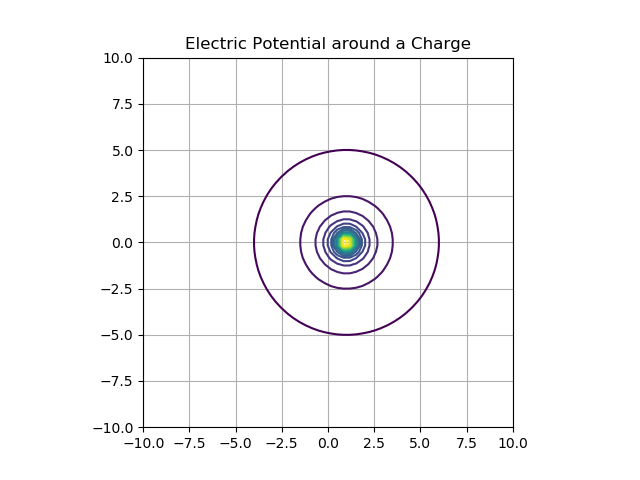

Text(0.5,1,'Electric Potential around a Charge')

In [12]:
# The shape of V should be the same as the shape of x and y that we checked above.
print("The shape of our electric potential array V is", np.shape(V))

ncontours = 25 # the number of (equally spaced) contour lines to plot. Leave this out to just use the default value

# Plot the variable V on the grid defined by x and y, using ncontours contour lines.
plt.figure()
plt.contour(x,y,V,ncontours)

plt.grid()                 # include gridlines on the plot.
plt.axis('scaled')         # aspect ratio 1:1
plt.axis([-10,10,-10,10]); # specify xlim,ylim for the plot
plt.title("Electric Potential around a Charge")

If you have correctly calculated `V`, you should see concentric circles centred on the charge position given in `qpos`. Try changing `qpos` and check that the charge position on the plot moves.

Note that the contour lines aren't equally spaced - can you see why?

We can choose various different settings for the contours, and even combine this with the density plots from above, using plt.imshow. Experiment with the cell below to find the effect you feel best displays the data!

<IPython.core.display.Javascript object>


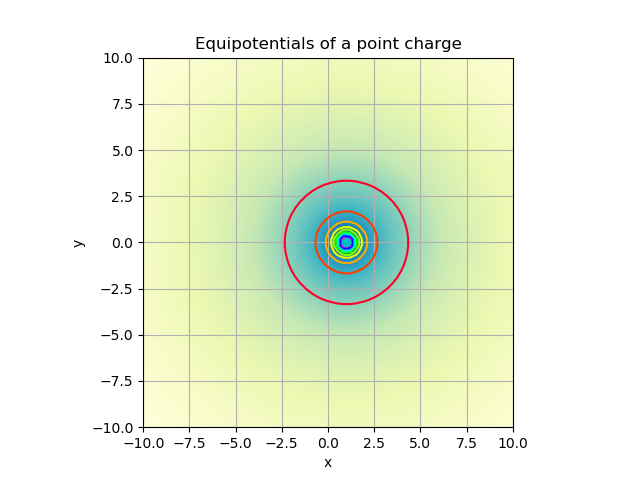

In [13]:
ncontours = 15 # the number of (equally spaced) contour lines to plot. Leave this out to just use the default value

plt.figure()
plt.contour(x,y,V,ncontours,cmap=plt.cm.gist_rainbow)
plt.imshow(np.log(V), interpolation='bilinear', origin='lower',
                cmap=plt.cm.YlGnBu, extent=(-10,10,-10,10))
plt.plot(qpos[0],qpos[1],"co")       # plot a small cyan circle at the position of the charge
plt.grid()
plt.axis('scaled')                   # aspect ratio 1:1
plt.axis([-10,10,-10,10])            # specify xlim,ylim
plt.title("Equipotentials of a point charge")
plt.xlabel("x")
plt.ylabel("y");

##  <a id="vectorfields"></a>3. Plotting Vector fields


Now we have the equipotentials sorted out, let's consider the electric field, which is of course a vector field. There are two ways of plotting vector fields in matplotlib, we'll look at both of them.

Before we can plot anything though, we need to calculate the electric field at each point on our grid of x and y values. This is given in a general form by
$$ \mathbf{E}(\mathbf{r}) = \frac{1}{4 \pi \varepsilon_0} \sum_i Q_i \frac{\mathbf{r_i}}{|\mathbf{r}_i|^3} $$

Here we're working in units where $1/(4\pi\varepsilon_0) = 1$, which simplifies things, and we only have a single charge. We need to calculate the vectors $\mathbf{r}$ though, which means our expression becomes

$$ \mathbf{E}(x,y) = q \frac{(x - q_x, y - q_y)}{\left[(x-q_x)^2 + (y-q_y)^2\right]^{3/2}} $$
where $(q_x, q_y) = $ `qpos`, and $q$ is the magnitude of the charge.

<div class="alert alert-success">
You're going to write a python <b><i>function</i></b> to calculate the electric field due to our point charge at qpos.  Name the function `Epoint()`. The function should take as its inputs:
<ul>
<li>The magnitude of the charge (usually $\pm 1$) </li>
<li>The position of the charge, `qpos` </li>
<li>`x` and `y`, to give the grid to calculate on. </li>
</ul>
It should output two arrays of the same size and shape as `x` and `y`, representing the electric field at these points.

Do this in the cell below. Remember to include an appropriate docstring for your function.
</div>

In [14]:
### STUDENT COMPLETED CELL ###

def Epoint(q, qpos, x, y): # defining electric field function
    '''Returns 2 values or 2 arrays of Electric Field (in x and y directions)for charge "q" at "qpos"
    - value of charge: q
    - coordinate (in x and y) position of charge: qpos
    - input x-value or array of x-values: x
    - input y-value or array of y-values: y'''
    denominator = np.sqrt((x - qpos[0])**2 + (y - qpos[1])**2)**3 # calculates denominator of E field equation
    ex = (q * (x - qpos[0]))/denominator # calculates x component of electric field
    ey = (q * (y - qpos[1]))/denominator # calculates y component of electric field
    return ex, ey

Once you've written the function, we can use it to calculate the electric field. This cell will produce two arrays, one containing the x-components of the E-field and one the y-components, for our charge +1 at qpos. 

In [15]:
Ex, Ey = Epoint(1,qpos,x,y) # calculate the electric field

We can check the shape of the outputs - this should be the same as the shape of x and y.

In [16]:
print("Shapes of our calculated field arrays:")
print(np.shape(Ex), np.shape(Ey))
print("Shapes of our grid arrays")
print(np.shape(x), np.shape(y))

Shapes of our calculated field arrays:
(60, 60) (60, 60)
Shapes of our grid arrays
(60, 60) (60, 60)


Again as a check, we can look at the value of the electric field at a single point. Let's choose the top left hand corner of the array, i.e. element [0,0]:

In [17]:
print("Value of the E-field at top LH corner of grid:", Ex[0,0], Ey[0,0])
print("Value of the electric potential at the same point:", V[0,0])

Value of the E-field at top LH corner of grid: -0.003348145128488433 -0.003043768298625848
Value of the electric potential at the same point: 0.06726727939963124


We can see from this (if your function is working!) that the E-field is indeed a vector, and is pointing in a direction away from the position of the (positive) charge, exactly as we'd expect.

Now let's think about how we want to plot this information. As mentioned above, there are two ways of doing this.

##### "Quiver" plot

For each point on our x,y grid, this function plots an arrow whose length and direction corresponds to the magnitude and direction of the vector field at that point. Let's see how this looks:


<IPython.core.display.Javascript object>


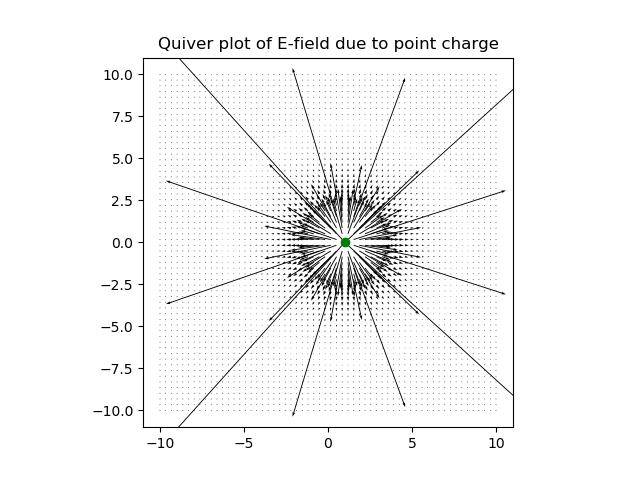

In [18]:
plt.figure()
plt.quiver(x,y,Ex,Ey)
plt.plot(qpos[0],qpos[1],"go") # plot a small green circle at the position of the charge
plt.axis('scaled')             # aspect ratio 1:1
plt.title("Quiver plot of E-field due to point charge");

We get a general idea of what the E-field looks like from this. As we can see, the longest arrows are those nearest the charge, while the arrows furthest from the charge position are almost single points. However,  it doesn't exactly look like the diagrams in an EM textbook!

Now let's try the second type of plot.

##### "Stream" plot

The streamplot function plots the field lines themselves. This plot looks considerably more like a plot from an electromagnetism textbook - however, note that it plots the field lines at a constant density, so you can't take the density of the field lines as an indicator of the strength of the field at that point, like you would be able to normally.

<IPython.core.display.Javascript object>


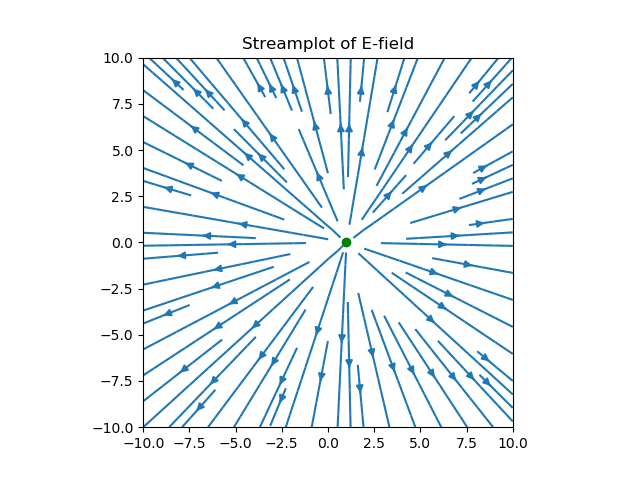

In [19]:
plt.figure()
plt.streamplot(x,y,Ex,Ey)
plt.plot(qpos[0],qpos[1],"go")
plt.axis('scaled')        # aspect ratio 1:1
plt.axis([-10,10,-10,10]) # specify xlim,ylim
plt.title("Streamplot of E-field");

We can extract more information from this data by using colour as an indicator of the field strength. In this cell, we calculate the magnitude of the field, and use that to colour the field lines appropriately. We choose to use the log of the magnitude, as the strength drops off quickly close to the origin.

<IPython.core.display.Javascript object>


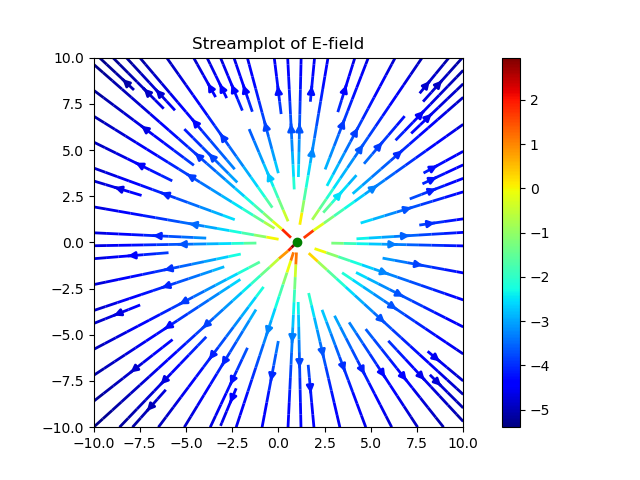

In [20]:
magnitude = np.sqrt(Ex**2 + Ey**2)    # magnitude of the electric field

plt.figure()
plt.streamplot(x,y,Ex,Ey,color=np.log(magnitude), linewidth=2, cmap=plt.cm.jet)
plt.plot(qpos[0],qpos[1],"go")
plt.colorbar()
plt.axis('scaled')                    # aspect ratio 1:1
plt.axis([-10,10,-10,10])             # specify xlim,ylim
plt.title("Streamplot of E-field");

We can also combine this with the contour plots for the electric potential:

<IPython.core.display.Javascript object>


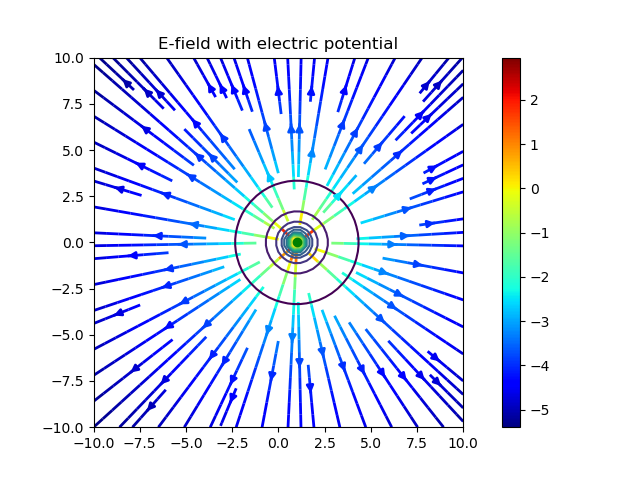

In [21]:
plt.figure()
plt.streamplot(x,y,Ex,Ey,color=np.log(magnitude), linewidth=2, cmap=plt.cm.jet)
plt.colorbar()                 # use the streamplot values for the colorbar
plt.contour(x,y,V,ncontours)   # plot the contour lines on top of the stream lines
plt.plot(qpos[0],qpos[1],"go") # small green circle at position of the +ve charge

plt.axis('scaled')             # aspect ratio 1:1
plt.axis([-10,10,-10,10])      # specify xlim,ylim
plt.title("E-field with electric potential");

### Task: an electric dipole, and beyond

<div class="alert alert-success">

If all has gone well, you should now have everything in place to be able to calculate for an arbitrary arrangement of charges. 
<br><br>
Keeping the first (positive) charge at $\mathbf{r} = (+1,0)$, add a negative charge to the system at position $\mathbf{r} = (-1,0)$. Use the "potential()" and "Epoint()" functions created above to calculate the *total* E-field and electric potential, and plot them in the way you think is best. Use text cells to describe the physics of what you observe.


<br><br>
If you have time after completing this, write additional code and text cells to add a third or fourth charge into the system. (Yes, there are extra points on the markscheme for this!)
This is most interesting if you choose a <i>symmetric</i> arrangement of charges, rather than random positions. In particular, you may want to consider a quadrupole arrangement, three charges in a line, or three charges on three corners of a square (which are examples you've already seen in the Electricity and Magnetism lectures!)
</div>

> STUDENT COMPLETED CODE AND TEXT CELLS - make sure you describe the physics of your results fully!


<IPython.core.display.Javascript object>


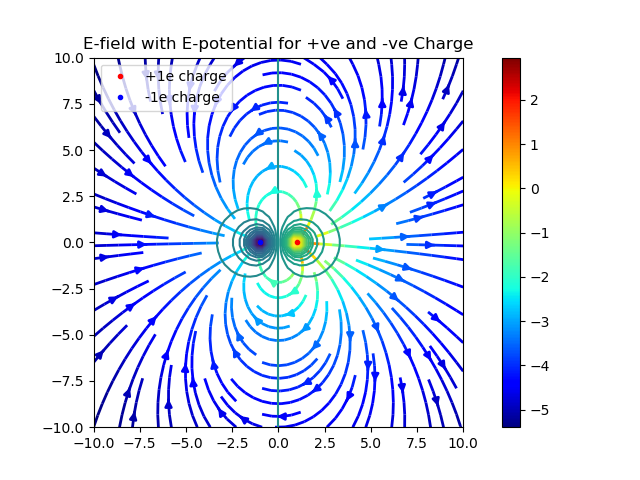

In [22]:
qpos = [1,0] # position of +ve charge
q = 1 # charge is positive, magnitude 1

qpos1 = [-1,0] # position of -ve charge
q1 = -1 # charge is negative, magnitude 1

ncontours1 = 40 # the number of (equally spaced) contour lines to plot

V_pos = potential(x,y,qpos,q) # calculates grid of electric potentials for positive charge
V_neg = potential(x,y,qpos1,q1) # calculates grid of electric potentials for negative charge
V_tot = V_pos + V_neg # calculates grid of total electric potential for all charges

Ex, Ey = Epoint(q, qpos, x, y) # calculate electric field for positive charge
Ex1, Ey1 = Epoint(q1, qpos1, x, y) # calculate electric field for negative charge
Ex_tot = Ex + Ex1 # calculate total electric field in x-direction
Ey_tot = Ey + Ey1 # calculate total electric field in y-direction

# plots electric potential and electric field of both charges
plt.figure()
plt.streamplot(x, y, Ex_tot, Ey_tot, color=np.log(magnitude), linewidth=2, cmap=plt.cm.jet) # plots total electric field
plt.colorbar() # plots a bar indicating which value is mapped to which colour
plt.contour(x, y, V_tot, ncontours1) # plots electric potential contour lines on top of the stream lines
plt.plot(qpos[0], qpos[1],"r.", label="+1e charge") # small red dot at position of the +ve charge
plt.plot(qpos1[0], qpos1[1],"b.", label="-1e charge") # small blue dot at position of the -ve charge
plt.legend(loc="upper left")
plt.axis('scaled') # 1:1 aspect ratio
plt.axis([-10,10,-10,10]) # axis limits
plt.title("E-field with E-potential for +ve and -ve Charge");

In the code cell above I have coded an extra negative charge and included it within the plot. The code comments can be used to explain the meaning of the code.

The green dot at position $(1, 0)$ is the $+1e$ charge and the pink dot at position $(-1, 0)$ is the $-1e$ charge. When drawing electric field lines, they are drawn from the positive charge to the negative charge. The plot about shows that plotted electric field lines go from the positive charge on the right to the negative charge on the left. Furthermore the colourbar on the right hand side of the plot shows the strength of the electric field, which shows that the strength of the electric field close to the postive charge is higher (darker red) than further away from the charge (dark blue on edge of plot), which is expected.
Furthermore, since there are 2 charges which each produce an electric field, the electric field at each point due to both charges must be added together for both the x and y components, as shown by the 11th and 12th lines of code.

For the electric potential each line represents an equipotential, which means that every point on that line has the same potential. Furthermore the closer the potential lines, as shown very close to both the positive and negative charges, the stronger the electric field since the electric field is equal to the rate of electric potential. The central green line at $x=0$ represents the line on which the electric potential due to all charges is zero $(V=0)$. This is because the electric potential is maximum at the positive charge and decreases rapidly (shown by the close potential lines) moving left as there is a negative charge that cancels the electric potential of the positive charge, so that at the center $V=0$ and then moving left, the potential becomes negative and decreases (negatively increases) further until the electric potential is negative maximum.

The reason the equipotential lines get further apart as distance $(r)$ from increases is because the electric potential due to a charge is inversely proportional to the distance from that charge. Therefore, which explains the mathematics of why the potential rapidly increases closer to the charge.

<IPython.core.display.Javascript object>


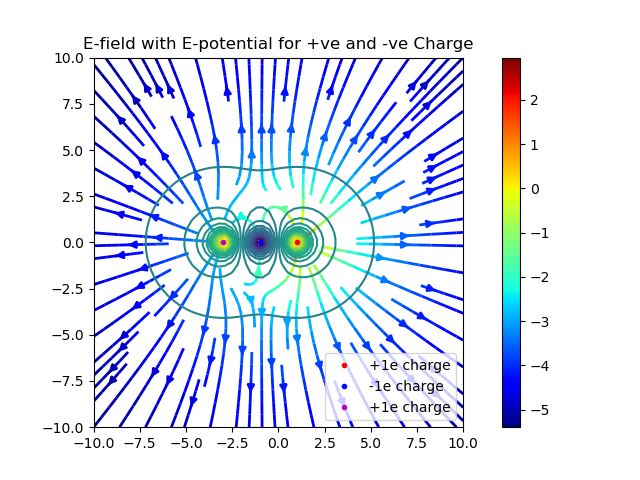

In [23]:
qpos2 = [-3,0] # position of 3rd charge
q2 = 1 # charge is positive, magnitude 1

V_2 = potential(x,y,qpos2,q2) # calculates grid of electric potentials for 3rd charge
V_tot1 = V_pos + V_neg + V_2 # calculates grid of total electric potential for all charges

Ex2, Ey2 = Epoint(q2, qpos2, x, y) # calculate electric field for 3rd charge
Ex_tot1 = Ex + Ex1 + Ex2 # calculate total electric field in x-direction
Ey_tot1 = Ey + Ey1 + Ey2 # calculate total electric field in y-direction

# plots electric potential and electric field of both charges
plt.figure()
plt.streamplot(x, y, Ex_tot1, Ey_tot1, color=np.log(magnitude), linewidth=2, cmap=plt.cm.jet) # plots total electric field
plt.colorbar() # plots a bar indicating which value is mapped to which colour
plt.contour(x, y, V_tot1, ncontours1) # plots electric potential contour lines on top of the stream lines
plt.plot(qpos[0], qpos[1],"r.", label="+1e charge") # small red dot at position of the +ve charge
plt.plot(qpos1[0], qpos1[1],"b.", label="-1e charge") # small blue dot at position of the -ve charge
plt.plot(qpos2[0], qpos2[1],"m.", label="+1e charge") # small magenta dot at position of the 3rd charge
plt.legend(loc="lower right")
plt.axis('scaled') # 1:1 aspect ratio
plt.axis([-10,10,-10,10]) # axis limits
plt.title("E-field with E-potential for +ve and -ve Charge");

An additional charge of $+1e$ has been added at $(-3, 0)$